<a href="https://colab.research.google.com/github/jenny005/Langgraph-Tutorial/blob/main/Copy_of_03_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generic Agent Architecture
![Router](https://github.com/esurovtsev/langgraph-intro/blob/main/images/generic-agent-architecture.png?raw=1)

- pass tool message back to model and let the model to decide:
    - make another call for a tool
    - spond directly

## ReAct (a general agent architecture)

- **act** - take an action
- **observe** - grab the response from the action
- **reason** - analyze the response and determine what to do next

## StockAnalysisAI

Examples of user requests the agent should handle:

- Should I invest in Tesla stocks?
- How does Tesla compare to Apple?
- What’s the stock symbol for Microsoft?
- Fetch the latest Tesla stock data and analyze it.

## Defining Tools

In [4]:
pip install -r /content/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.2/153.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.2/1

In [8]:
from dotenv import load_dotenv  # load environment variables from a .env file into your program’s os.environ dictionary
load_dotenv("/content/.env", override=True)

True

In [3]:
import requests

def lookup_stock_symbol(company_name: str) -> str:
    """
    Converts a company name to its stock symbol using a financial API.

    Parameters:
        company_name (str): The full company name (e.g., 'Tesla').

    Returns:
        str: The stock symbol (e.g., 'TSLA') or an error message.
    """
    api_url = "https://www.alphavantage.co/query"
    params = {
        "function": "SYMBOL_SEARCH",
        "keywords": company_name,
        "apikey": "AlphaVantage"
    }

    response = requests.get(api_url, params=params)
    data = response.json()

    if "bestMatches" in data and data["bestMatches"]:
        return data["bestMatches"][0]["1. symbol"]
    else:
        return f"Symbol not found for {company_name}."

lookup_stock_symbol("Tesla")

'TSLA'

In [4]:
import yfinance as yf
import json
from pprint import pformat
import ast

def fetch_stock_data_raw(stock_symbol: str) -> dict:
    """
    Fetches comprehensive stock data for a given symbol and returns it as a combined dictionary.

    Parameters:
        stock_symbol (str): The stock ticker symbol (e.g., 'TSLA').
        period (str): The period to analyze (e.g., '1mo', '3mo', '1y').

    Returns:
        dict: A dictionary combining general stock info and historical market data.
    """
    period = "1mo"
    try:
        stock = yf.Ticker(stock_symbol)

        # Retrieve general stock info and historical market data
        stock_info = stock.info  # Basic company and stock data
        stock_history = stock.history(period=period).to_dict()  # Historical OHLCV data

        # Combine both into a single dictionary
        combined_data = {
            "stock_symbol": stock_symbol,
            "info": stock_info,
            "history": stock_history
        }

        return pformat(combined_data)

    except Exception as e:
        return {"error": f"Error fetching stock data for {stock_symbol}: {str(e)}"}

data = fetch_stock_data_raw("TSLA")
print(data)

{'history': {'Close': {Timestamp('2025-07-14 00:00:00-0400', tz='America/New_York'): 316.8999938964844,
                       Timestamp('2025-07-15 00:00:00-0400', tz='America/New_York'): 310.7799987792969,
                       Timestamp('2025-07-16 00:00:00-0400', tz='America/New_York'): 321.6700134277344,
                       Timestamp('2025-07-17 00:00:00-0400', tz='America/New_York'): 319.4100036621094,
                       Timestamp('2025-07-18 00:00:00-0400', tz='America/New_York'): 329.6499938964844,
                       Timestamp('2025-07-21 00:00:00-0400', tz='America/New_York'): 328.489990234375,
                       Timestamp('2025-07-22 00:00:00-0400', tz='America/New_York'): 332.1099853515625,
                       Timestamp('2025-07-23 00:00:00-0400', tz='America/New_York'): 332.55999755859375,
                       Timestamp('2025-07-24 00:00:00-0400', tz='America/New_York'): 305.29998779296875,
                       Timestamp('2025-07-25 00:00:00-0400', tz

## Binding tools to the LLM

In [9]:
from langchain_core.tools import Tool
from langchain_openai import ChatOpenAI

# Create tool bindings with additional attributes
lookup_stock = Tool.from_function(
    func=lookup_stock_symbol,
    name="lookup_stock_symbol",
    description="Converts a company name to its stock symbol using a financial API.",
    return_direct=False  # Return result to be processed by LLM
)

fetch_stock = Tool.from_function(
    func=fetch_stock_data_raw,
    name="fetch_stock_data_raw",
    description="Fetches comprehensive stock data including general info and historical market data for a given stock symbol.",
    return_direct=False
)

toolbox = [lookup_stock, fetch_stock]

# OPENAI_API_KEY environment variable must be set
simple_llm = ChatOpenAI(model="gpt-4o-mini")
llm_with_tools = simple_llm.bind_tools(toolbox)

## Defining Agent's node

In [10]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState

# System message
assistant_system_message = SystemMessage(content=("""
You are a professional financial assistant specializing in stock market analysis and investment strategies.
Your role is to analyze stock data and provide **clear, decisive recommendations** that users can act on,
whether they already hold the stock or are considering investing.

You have access to a set of tools that can provide the data you need to analyze stocks effectively.
Use these tools to gather relevant information such as stock symbols, current prices, historical trends,
and key financial indicators. Your goal is to leverage these resources efficiently to generate accurate,
actionable insights for the user.

Your responses should be:
- **Concise and direct**, summarizing only the most critical insights.
- **Actionable**, offering clear guidance on whether to buy, sell, hold, or wait for better opportunities.
- **Context-aware**, considering both current holders and potential investors.
- **Free of speculation**, relying solely on factual data and trends.

### Response Format:
1. **Recommendation:** Buy, Sell, Hold, or Wait.
2. **Key Insights:** Highlight critical trends and market factors that influence the decision.
3. **Suggested Next Steps:** What the user should do based on their current position.

If the user does not specify whether they own the stock, provide recommendations for both potential buyers and current holders. Ensure your advice considers valuation, trends, and market sentiment.

Your goal is to help users make informed financial decisions quickly and confidently.
"""))

# Node
def assistant(state: MessagesState):
   return {"messages": [llm_with_tools.invoke([assistant_system_message] + state["messages"])]}

## Defining Graph

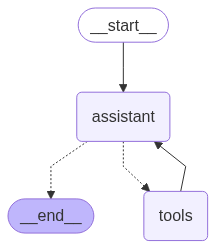

In [11]:
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display

# Graph
builder = StateGraph(MessagesState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(toolbox))

# Define edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "assistant")
react_graph = builder.compile()

# Show
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

## Testing

In [12]:
messages = react_graph.invoke({"messages": [HumanMessage(content="Should I invest in Tesla stocks?")]})
for message in messages['messages']:
    message.pretty_print()

================================ Human Message =================================

Should I invest in Tesla stocks?
================================== Ai Message ==================================
Tool Calls:
  lookup_stock_symbol (call_pJAndWHQc5k3FRFBCS5joYwA)
 Call ID: call_pJAndWHQc5k3FRFBCS5joYwA
  Args:
    __arg1: Tesla
================================= Tool Message =================================
Name: lookup_stock_symbol

TSLA
================================== Ai Message ==================================
Tool Calls:
  fetch_stock_data_raw (call_yNXUMlqQLVAm5sJ5q7RInxBm)
 Call ID: call_yNXUMlqQLVAm5sJ5q7RInxBm
  Args:
    __arg1: TSLA
================================= Tool Message =================================
Name: fetch_stock_data_raw

{'history': {'Close': {Timestamp('2025-07-14 00:00:00-0400', tz='America/New_York'): 316.8999938964844,
                       Timestamp('2025-07-15 00:00:00-0400', tz='America/New_York'): 310.7799987792969,
                       Timest

In [13]:
messages = react_graph.invoke({"messages": [HumanMessage(content="How does Tesla compare to Apple? What would be a better option to invest in?")]})
for message in messages['messages']:
    message.pretty_print()

================================ Human Message =================================

How does Tesla compare to Apple? What would be a better option to invest in?
================================== Ai Message ==================================
Tool Calls:
  lookup_stock_symbol (call_skOXfCTYSjNeJ9CkP5bLGrYR)
 Call ID: call_skOXfCTYSjNeJ9CkP5bLGrYR
  Args:
    __arg1: Tesla
  lookup_stock_symbol (call_ulmruFMBJmEemmR1z3iNtOBz)
 Call ID: call_ulmruFMBJmEemmR1z3iNtOBz
  Args:
    __arg1: Apple
================================= Tool Message =================================
Name: lookup_stock_symbol

TSLA
================================= Tool Message =================================
Name: lookup_stock_symbol

APLE
================================== Ai Message ==================================
Tool Calls:
  fetch_stock_data_raw (call_fITdcTOeYKdnzueGb1LMsYXL)
 Call ID: call_fITdcTOeYKdnzueGb1LMsYXL
  Args:
    __arg1: TSLA
  fetch_stock_data_raw (call_TXtk50jpz4uh5muPv9Nv77eK)
 Call ID: call